# Joining Weather Events & Motor Vehicle Claims

### Intro/ Questions


### Libraries and importng csvs

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# install.packages("magrittr")
# install.packages("purrr")
library(dplyr)
library(magrittr) # better handling of pipes
library(purrr)
library(statistics)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




ERROR: Error in library(statistics): there is no package called ‘statistics’


In [15]:
age <- "age.csv" %>%
              read_csv() 
ethnicity <- "ethnicity.csv" %>%
              read_csv() 
gender <- "gender.csv" %>%
              read_csv()  
month <- "month.csv" %>%
              read_csv() 
region <- "region.csv" %>%
              read_csv() 
road <- "road.csv" %>%
              read_csv() 
weather <- "weather.csv" %>%
              read_csv() 

Parsed with column specification:
cols(
  age = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  ethnicity = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  gender = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  month = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  region = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  road_factor = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  Year = col_double(),
  Month =

In [16]:
#need to change column name of Weather Event and Affected Area to one word 

weather <- weather %>% rename (weather_event = "Weather Event") %>%
    rename (affected_area = "Affected Area") %>%
    rename (year = "Year")


In [17]:
#Group weather dataframe by year and collect all events in particular year in a new column 
weather_by_year <- weather %>%
    group_by(year) %>%
    summarise(weather_event = paste(weather_event, collapse = ","))

`summarise()` ungrouping output (override with `.groups` argument)



In [18]:
weather_by_year
# Double values seen below in weather_event column 

year,weather_event
<dbl>,<chr>
2010,"Flood,Storm,Flood,Flood,Flood,Flood,Storm,Flood,Flood,Flood,Winds,Winds,Storm,Storm,Flood,Flood"
2011,"Heavy Rain, Flood,Heavy Rain, Flood,Flood, Winds,Flood, Winds,Snowfall,Snowfall,Tornado,Heavy Rain, Winds,Heavy Rain, Winds,Tornado,Flood,Storm,Flood"
2012,"Tornado,Storm,Weather Bomb"
2013,"Storm,Storm,Storm,Storm,Storm"
2014,"Storm,Storm,Storm,Storm,Storm"
2015,"Storm,Storm,Storm,Flood,Tornado,Flood"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Storm, Cyclone,Cyclone,Heavy Rain, Flood"
2018,"Storm,Storm,Cyclone,Cyclone,Storm"


In [19]:
# remove duplicated values in weather_event column
weather_by_year <- weather_by_year %>%
    # remove spacing after commas
    separate_rows(weather_event, sep = ", ") %>%
    separate_rows(weather_event, sep = ",") %>%
    group_by(year) %>%
    summarise(weather_event = paste(unique(weather_event), collapse = ","))

weather_by_year 

`summarise()` ungrouping output (override with `.groups` argument)



year,weather_event
<dbl>,<chr>
2010,"Flood,Storm,Winds"
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm"
2012,"Tornado,Storm,Weather Bomb"
2013,Storm
2014,Storm
2015,"Storm,Flood,Tornado"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Cyclone,Heavy Rain"
2018,"Storm,Cyclone"


In [20]:
#group Acc claims Month df by Year , then apply sum aggregation on claims column to give year-wise total claims (sum total of all the months claims of year) made 
month <- month %>%
    group_by(year)%>%
    summarise(new_claims_total = sum(New_claims))

`summarise()` ungrouping output (override with `.groups` argument)



In [21]:
month


year,new_claims_total
<dbl>,<dbl>
2011,32299
2012,31681
2013,32445
2014,32498
2015,36145
2016,37878
2017,38596


In [22]:
# Joining month df to weather dataframe 
weather_months_joined <- merge(x = month, y = weather_by_year, by = "year", all = TRUE)%>%
    arrange(desc(new_claims_total))

weather_months_joined

year,new_claims_total,weather_event
<dbl>,<dbl>,<chr>
2017,38596,"Flood,Storm,Cyclone,Heavy Rain"
2016,37878,"Cold Snap,Storm"
2015,36145,"Storm,Flood,Tornado"
2014,32498,Storm
2013,32445,Storm
2011,32299,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm"
2012,31681,"Tornado,Storm,Weather Bomb"
2010,NA,"Flood,Storm,Winds"
2018,NA,"Storm,Cyclone"


In [23]:
#count up total number of events per year 
total <- c(4,2,3,1,1,6,3,3,2,3,1)

weather_months_joined %>% 
    mutate(total_weather = c("4","2","3","1","1","6","3","3","2","3","1"))

year,new_claims_total,weather_event,total_weather
<dbl>,<dbl>,<chr>,<chr>
2017,38596,"Flood,Storm,Cyclone,Heavy Rain",4
2016,37878,"Cold Snap,Storm",2
2015,36145,"Storm,Flood,Tornado",3
2014,32498,Storm,1
2013,32445,Storm,1
2011,32299,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,31681,"Tornado,Storm,Weather Bomb",3
2010,NA,"Flood,Storm,Winds",3
2018,NA,"Storm,Cyclone",2


In [24]:
#weather_months_joined %>% 
    #transform(year = as.numeric(year))

In [25]:
sapply(weather_months_joined, class)

year new_claims_total    weather_event 
       "numeric"        "numeric"      "character"

Warning message:
“Removed 4 rows containing missing values (position_stack).”


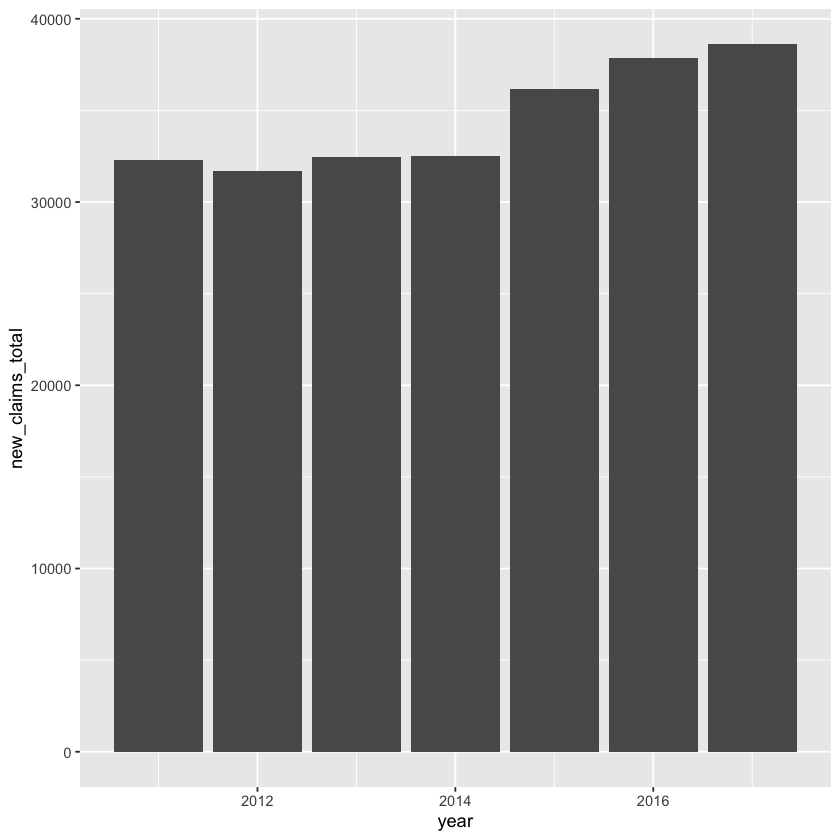

In [26]:
 weather_months_joined%>%
  ggplot(aes(x = year, y = new_claims_total)) +
  geom_col()